## Rama Almoustadi's Individual Planning Report

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [38]:
#exploring and loading the datasets 
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")
glimpse(players)
glimpse(sessions)
#used this code to calculate the summary statistics for players.csv
summ_stats_players <- players |>
    summary()
summ_stats_players

#used this code to get the number of players in each experience level, looking at the output of rows
amateur_count <- players |>
    filter(experience == "Amateur") |>
    nrow()
amateur_count

beginner_count <- players |>
    filter(experience == "Beginner") |>
    nrow()
beginner_count 

regular_count <- players |>
    filter(experience == "Regular") |>
    nrow()
regular_count 

pro_count <- players |>
    filter(experience == "Pro") |>
    nrow()
pro_count 

veteran_count <- players |>
    filter(experience == "Veteran") |>
    nrow()
veteran_count 

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

[1] 63

[1] 35

[1] 36

[1] 14

[1] 48

### 1) Data Descriptions - two files

#### a) players.csv

Contains 196 observations (rows) and 7 variables (columns)

Variables, their types, and descriptions:

- `experience` - character type, desribing players experience level between amateur, beginner, regular, pro, and veteran
- `subscribe` - logical type, whether the players are subscibed to the game-related newsletter
- `hashedEmail` - character type, a unique string of characters that correspond digitally to the players emails
- `played_hours` - double type, the total game time (in hours) by a player
- `name` - character type, the players' names
- `gender` - character type, the players' genders
- `Age` - double type, the age of the players

These data were likely collected by self-reports of variables (experience, name, gender, age, email, subscribe) by each player, and the additional variable, played_hours, in the data set were available through play time data.

The data is presented in a tidy format, but still may present issues with incorrect data types for some of the variables depending on the following analysis. For instance, age would be better off as an integer type, and experience as a factor.

#### Summary statistics

| Summary Statistic | Age | Played Hours |
|-------------------|-----|---------------|
| Maximum | 58 | 223.1 |
| Minumum | 9 | 0 |
| Mean | 21 | 5.8 |



| Experience Level | # of Players |
|------------------|--------------|
| Amateur | 63 |
| Beginner | 35 |
| Regular | 36 |
| Pro | 14 |
| Veteran | 48 |


#### b) sessions.csv

Contains 1535 observations (rows), and 5 variables (columns)

Variables, their types, and descriptions: 

- `hashed_email` - character type, digitalized unique string of characters for each players email
- `start_time` - character type, the start time of a play session
- `end_time` - character type, the end time of a play session
- `original_start_time` - double type, the value of the start time of a play session in milliseconds
- `original_end_time` - double type, the value of the end time of a play session in milliseconds

These data were collected by recordings of the players' Minecraft server gameplay, recording the start and end time of a play session. 

Issues present themselves with the untidy format of the data, particularly the columns start_time and end_time, which currently hold both the date and time in one column. These values should be separated into different columns. Once these are split, the date column should be data type `date`.

#### Summary statistics

Since the data are in an untidy format and have not yet been converted to their suitable data types, there are no helpful summary statistics that can be performed.

### 2) Questions

**Broad:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific:** Can the age and total play time of a player predict if they will subscribe to a game-related newsletter? 

This question could be used to direct marketing techniques/efforts made to different age groups and frequent/unfrequent players and cater communication of the subscription to who is most likley as well as unlikely to subscribe to the newsletter.  Using the `age`, `played_hours`, and `subscribe` variables from the dataset players.csv, a k-nn classification model could be used to explore this question. The data must be wrangled to be applied, specifically the data types of the two variables at hand, with the age variable being converted to an integer and the subscribe variable (our categorical variable) must be converted to a factor, with renamed factor values.


### 3) Exploratory Data Analysis and Visualization

The dataset `players.csv` was loaded at the beginning of this notebook and the head is loaded again below (for space), which outputs a tidy data frame with no additional wrangling needed. Each variable is occupies its own column, with a single observation under those columns and each cell only contains one value, giving us a tidy data frame to work with!


The mean values for the quantitative variables `played_hours` and `age` are restated here:

| Variable | Mean |
|------|----------|
| Played Hours | 5.8 |
| Age | 21 |


In [41]:
players <- read_csv("data/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Two visualizations are made to explore the data and relevant variables:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


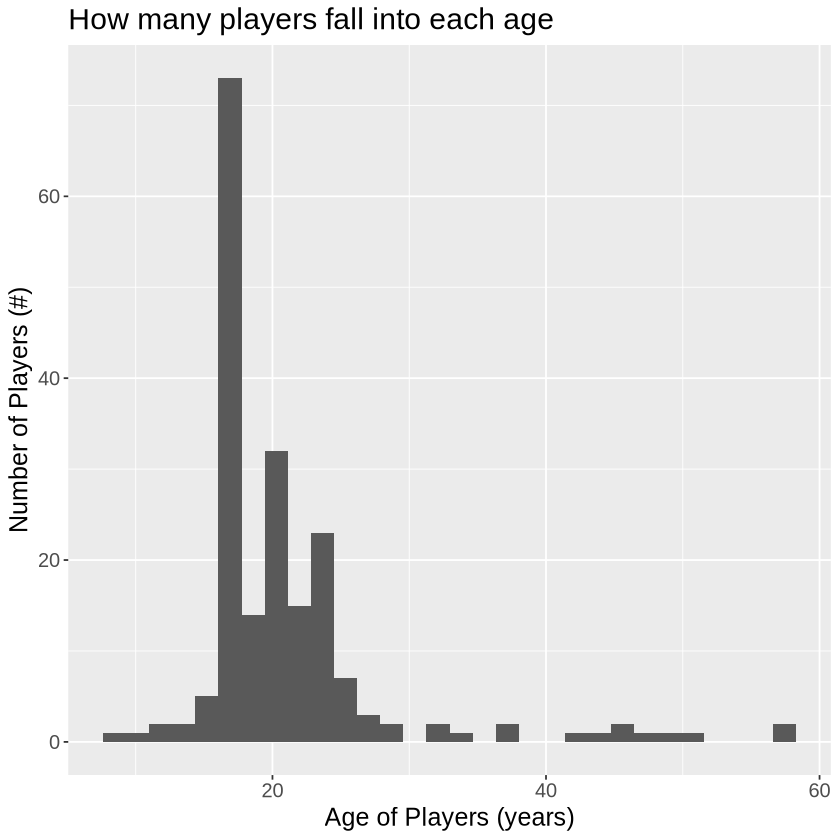

In [48]:
age_plot <- players |>
    ggplot(aes(x = Age)) +
    geom_histogram() +
    labs(x = "Age of Players (years)", y = "Number of Players (#)", title = "How many players fall into each age") +
    theme(text = element_text(size = 15))
age_plot

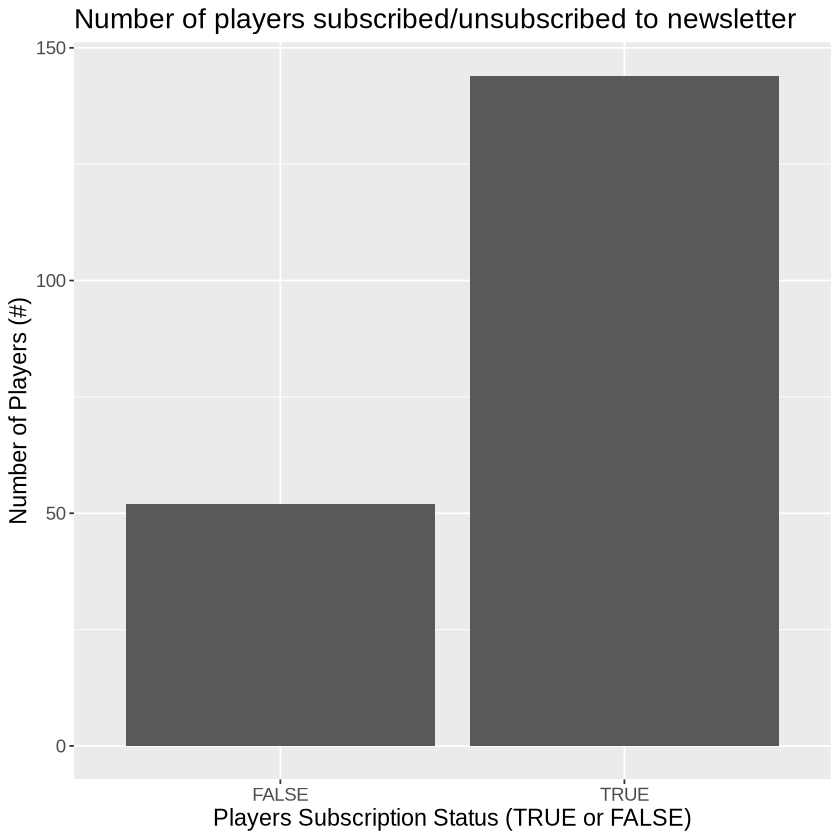

In [56]:
subscribe_plot <- players |>
        ggplot(aes(x = subscribe)) +
        geom_bar() + 
        labs(x = "Players Subscription Status (TRUE or FALSE)", y = "Number of Players (#)", 
             title = "Number of players subscribed/unsubscribed to newsletter") +
        theme(text = element_text(size = 14))
subscribe_plot

Insights from these plots:

- The most common age range of players in this study falls around 16 to 24 respectively, with the most players in the age category of around 16 years
- There is a large jump in the number of players from ~15 years old to the large peak of ~16 years old
- There are gaps (i.e. no players of that age) in the distribution of ages, particularly evident as age increases
- There are more players subscribed than not

### 4) Methods and Plan

The method I would use to approach to try and answer this question is k-nn classification, since the question is trying to use the `age` and `played_hours` variables to predict whether a player will subscribe to the newsletter or not (category of subscribe or unsubscribed). 

Whats beneficial about using k-nn is that it can fit to any shape of data, in other words, has no assumption of what the data should look like to be an effective predictor. This would be good for the variables at hand since from our age plot, there does not seem to be a consistent shape of the data points. The data set is also not overwhelmingly large and so it is unlikely that the model would become slow. The predictors need to be standardized for the most unbiased output of predictions.

A limitation that appears in the variables framing this problem is the imbalance of classes that can be seen in the bar plot of subscribed players versus unsubscribed players. This might lead to predictions being biased towards the subscribed category simply due to the scarcity of unsubscribed players in comparison. However, this can be fixed by oversampling the unsubscribed class by replicating the unscribed cases to even them out.

The model needs to be tuned to identify the optimal k value, which first requires the data to be split and preprocessed. I would choose to split the players data into 75% training data and leave 25% for testing data to use later, and then standardize the training data. Within the training data, I would perform 10-fold cross-validation (since these data are unexplored previously) from 5-50 going up by 5's. I would then choose to retrain the training model based on the k that gives me the lowest RMSE value. 